># Introducción a numpy

>Más sobre las funciones matemáticas básicas de numpy en <a>hhttps://numpy.org/doc/stable/reference/routines.math.html</a>

>Más sobre cómo escribir en markdown en <a>https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook</a>

>## Arrays
Los arrays en Python se asemejan a los vectores de $n$ componentes, es decir, elementos de $\R^n$, pero las operaciones se hacen *element-wise*, es decir, elemento a elemento, por eso los vectores y los arrays son dos cosas fundamentalmente distintas. Digamos que con las funciones que nos proporciona python, un array es un vector en esteroides. De hecho, ya se verá más adelante que gracias a las funciones de numpy, puedo tratar a los arrays para que hagan operaciones de producto escalar, vectorial y to la pesca.

Por ahora importamos numpy, que es una librería con un montón de funciones matemáticas superútiles y matplotlib, que sirve para dibujar.

In [76]:
import numpy as np
import matplotlib.pyplot as plt

Vamos a ver varios tipos de arrays que podemos generar

In [77]:
a1 = np.array([3,5,4,9]) #a los arrays se les feedea con listas, es decir, elementos entre brackets
a2 = np.zeros(5) #crea un array de cinco ceros
a3 = np.ones(5) #este de 1's
a4 = np.random.random(10) #numeros random entre 0 y 1
a5 = np.random.randn(1000) #numeros random con distribucion gaussiana


Par ver que lo último es cierto, vamos a plotear el histograma para ver que la distribucion de valores de $a_5$ es una gaussiana

(array([ 2.,  1.,  2.,  5., 11., 15., 23., 39., 32., 58., 66., 84., 72.,
        78., 89., 86., 89., 63., 58., 43., 29., 24., 10.,  9.,  4.,  3.,
         1.,  1.,  1.,  2.]),
 array([-3.15088299, -2.9260914 , -2.70129982, -2.47650823, -2.25171664,
        -2.02692505, -1.80213347, -1.57734188, -1.35255029, -1.12775871,
        -0.90296712, -0.67817553, -0.45338394, -0.22859236, -0.00380077,
         0.22099082,  0.4457824 ,  0.67057399,  0.89536558,  1.12015717,
         1.34494875,  1.56974034,  1.79453193,  2.01932351,  2.2441151 ,
         2.46890669,  2.69369828,  2.91848986,  3.14328145,  3.36807304,
         3.59286462]),
 <BarContainer object of 30 artists>)

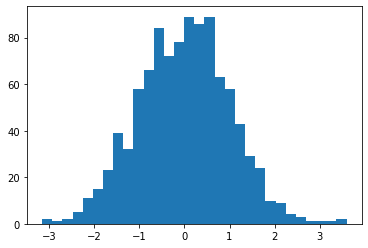

In [78]:
plt.hist(a5, bins =30) #bins es el numero de columnas que quiero que haya en el histograma

Mentir, no he mentido. Si yo le digo a python que me cree un histograma con mas barras se va a ver mejor la gaussiana, y si le feedeo mas valores a mi array se va a ver ultraperfe. Pero vaya, se ve como coge la forma de campana gaussiana, con lo cual guay

In [79]:
a6 = np.linspace(0,10, 100) #te genera un array de evenly spaced
#numbers desde tal hasta tal. El ultimo parámetro te indica cuantos
#valores quieres que tome. Por defecto son 50
#esto es megaútil si queremos plotear porque nos genera los valores
#que va a tomar el eje de las abcisas

a7= np.arange(0,10,0.02) #parecido al linspace pero aqui no te
#digo en cuantos pasos lo quiero, te digo como de espaciados los
#quiero y el ya se encarga de darle el tamaño al array que necesite

Estos arrays que hemos aprendido son importantisimos porque los vamos a estar usando todo el puto rato. Pero por que usamos arrays en vez de lists? Es que los arrays tienen propiedades muy chulas. Vamos a verlo:

In [80]:
2*a1 #multiplica cada elemento por 2. Las hace elemento a elemento

array([ 6, 10,  8, 18])

Y dividir por un "vector"? (cuidao con llamarle vector a los arrays porque un vector es una serie de numeros que tiene ciertas propiedades matemáticas. Por eso yo no puedo dividir un real entre un vector pero con un array puedo hacerlo porque es otra entidad completamente distinta aunque a la vista sean iguales)

In [81]:
1/a1 #Python lo trata como un "te hago la inversa de cada elemento
#del array y lo meto en otro array"

array([0.33333333, 0.2       , 0.25      , 0.11111111])

Lo guapo de esto es que  con las operaciones de arrays vamos a poder aplicar unas pocas de operaciones al mismo tiempo para un monton de elementos. Todo a la vez.

Las operaciones booleanas tambien son canela en rama. Veamos:


In [82]:
#veamos los elementos de a1 que son > 4
a1>4 #=Para todos los i en el array, es a1(i)>4?

array([False,  True, False,  True])

Esto lo que nos devuelve es un array de verdaderos y falsos que no es que tenga mucha utilidad en si, pero nos va a permitir *indexar*. Básicamente filtrar resultados.

Por ejemplo "muéstrame los elementos de $a_1$ que son $>4$"

In [83]:
a1[a1>4]

array([5, 9])

En general puedo hacer operaciones mezclando arrays y tal. Ejemplo:

In [84]:
1/a1+2 + 3*a1

array([11.33333333, 17.2       , 14.25      , 29.11111111])

Dijimos que todo esto estaba de puta madre para plotear. Veamos.
Supongamos que quiero plotear la funcion $x^2$, entonces vamos a crear los valores de 0 a 1 y vamos a darle 100 puntos para que se vea smooth

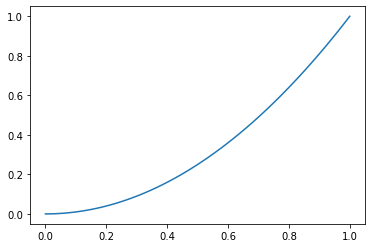

In [85]:
x = np.linspace(0,1,100)
y = x**2
plt.plot(x, y) #plotear y(x), osea el array y en funcion del x

Definamos una función

In [86]:
def f(x):#toma una x pero no es exact. la x que hemos definido antes
    return x**2 * np.sin(x)/np.exp(-x)

En una función normal yo le meto un número y sale un número. Pero es que con los arrays puedo hacer estas operaciones a muchos muchos valores del tirón a la misma vez.

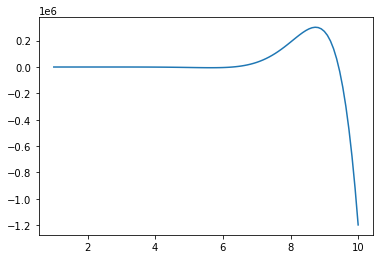

In [87]:
a = np.linspace(1,10,100)
b = f(a) #f se evalúa en cada valor del array a al mismo tiempo
#en vez de coger un for loop para loopear entre los distintos valores
#puedo hacerlo así

plt.plot(a,b)

>### Array indexing

Vamos a hacer cosas mas complicadas. Supongamos un array

In [88]:
v1= np.array([2,4,6,8,10])
#Vamos a mirar al primer elemento, indexado en el 0
v1[0]

2

Supongamos que yo sólo quiero una parte del array. Por ejemplo, a partir del tercer elemento. Se hace con el elemento a partir del que quieres empezar a contar (inclusive) y dos puntos (:)

In [89]:
v1[2:]

array([ 6,  8, 10])

Si quiero coger desde el principio hasta cierto elemento entremedias del vector, tambien lo puedo hacer. Ejemplo "coge y me enseñas todos los elementos hasta el antepenúltimo inclusive

In [90]:
v1[:-2]

array([2, 4, 6])

O por ejemplo si quiero desde el segundo elemento hasta el antepenúltimo:

In [91]:
v1[1:-2]

array([4, 6])

O por ejemplo hasta el tercer elemento

In [92]:
v1[:2]

array([2, 4])

O por ejemplo los dos últimos

In [93]:
v1[-2:]

array([ 8, 10])

El indexado booleano es la herramienta potente para un montón de aplicaciones. Cuidao porque esto es importante. Es super útil.

Ejemplo: "En $v_1$ enséñame los elementos que son $>3$"

In [94]:
v1[v1>3]

array([ 4,  6,  8, 10])

Esto es útil cuando estamos manejando un montón de datos. Por ejemplo, de una lista de nombres vámos a ver cuáles empiezan con la letra J. Pongámosla del tirón y la vamos explicando por partes:

In [95]:
nombres= np.array(['Jim','Pam','Michael','Dwight','Creed','Kevin','Óscar','Angela','Kelly','Meredith','Ryan','Jan'])
primera_letra_J= np.vectorize(lambda s: s[0])(nombres)=='J'

·Lambda es una funcion anonima que coge un array cualquiera 's' y me devuelve el primer elemento

In [96]:
g = lambda s: s[0]
g('gilipollas')

'g'

·El 'vectorize' lo que hace es crear un loop que coge el array
que le pasamos en el otro paréntesis y le aplica la función
de su argumento. En este caso "para cada elemento en el array "nombres", aplico la función 'coger la primera letra del elemento s' "

Vamos a ver entonces que hasta ahora, esto que hemos descrito es lo que hace la función. Nos tendrían que salir la primera letra de todos los nombres de la lista

In [97]:
np.vectorize(lambda s: s[0])(nombres)

array(['J', 'P', 'M', 'D', 'C', 'K', 'Ó', 'A', 'K', 'M', 'R', 'J'],
      dtype='<U1')

Veamos que funciona usando el valor que le hemos dado a la variable:

In [98]:
np.vectorize(g)(nombres)

array(['J', 'P', 'M', 'D', 'C', 'K', 'Ó', 'A', 'K', 'M', 'R', 'J'],
      dtype='<U1')

Así que lo que tenemos aquí es un array, es otro array de hecho.
Con el " =='J' " lo que hago es indexarlo booleanamente. Lo que quiero decir con esto es "dime para cada elemento del array si es verdadero o falso que empieza por la letra J" . Veamos:

In [99]:
primera_letra_J

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True])

Efectivamente me ha devuelto un array que me dice qué nombres empiezan por J y cuáles no. Pero ahora quiero filtrarlo. Entonces vamos a hacer como hacíamos cuando queríamos ver qué  elementos de un array tenían un valor >4. Se hace igual, vaya:

In [100]:
nombres[primera_letra_J]

array(['Jim', 'Jan'], dtype='<U8')

Esto es una herramienta poderosísima cuando tenemos muchos datos y como se ve, esto numpy te lo hace en un plis y en una línea pero de primeras hacer esto como que no. Esto lo vas cogiendo con maestría y con tiempo.

Inciso sobre las funciones $\lambda$ :

 las funciones Lambda se definen como una línea que ejecuta una sola expresión. Este tipo de funciones pueden tomar cualquier número de argumentos, pero solo pueden tener una expresión.

In [101]:
#Ejemplo para caracterizar:

#Aquí tenemos una función creada para sumar.

def suma(q,p):
    return(q + p)
    
#Aquí tenemos una función Lambda que también suma.
lambda q,p : q + p

#Para poder utilizarla necesitamos guardarla en una variable.
suma_dos = lambda q,p : q + p
suma_dos(3,5)

8

Sigamos con operaciones basicas de arrays.

In [102]:
a1%4 #divide a1 entre 4 y dime cuanto vale el resto

array([3, 1, 0, 1], dtype=int32)

In [103]:
a1%4 == 0 #son los elementos de a1 divisibles entre 4?

array([False, False,  True, False])

In [104]:
a1[a1%4 == 0] #cuales son divisibles entre 4?


array([4])

Donde brilla numpy es en el calculo y la estadistica. Es muy rapido y muy potente.

In [105]:
v2 = 2*np.random.randn(10000)+10
#si la funcion randn nos producia numeros con desviacion estandar uno
#  y media cero, multiplicar el array por 2 hace que la desviacion
#  estandar sea 2 y sumarle 10 nos traslada la media a 10

In [106]:
np.mean(v2) #la media

10.030797271354185

In [107]:
np.std(v2) #desviacion estandard

2.0195850373493136

Los percentiles: cuantos numeros son mas grandes que cierto valor?

In [108]:
np.percentile(v2, 80) #el número para el cual el 80 por 
#ciento de los valores del array son menores que ese número

11.732655311279144

> ## Integrales y derivadas

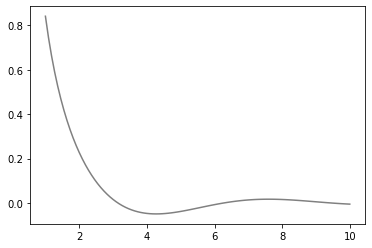

In [109]:
n = np.linspace(1,10,100)
m = 1/n**2 * np.sin(n)

plt.plot(n,m, color='grey')

Encontrar las derivadas y las integrales a mano es un puto coñazo. Vamos a encontrarlas numericamente y las vamos a dibujar

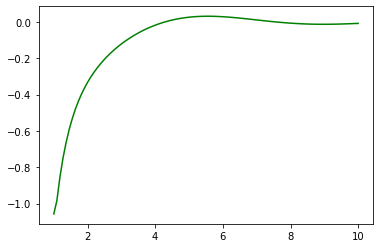

In [110]:
dmdn= np.gradient(m,n) #derivada
plt.plot(n,dmdn, color='green')

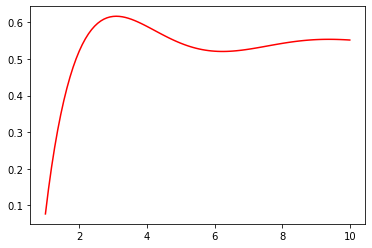

In [111]:
intm = np.cumsum(m)*(n[1]-n[0]) #integral. El término de la diferencia es el diferencial dx
#cumsum es la suma cumulativa de los elementos de un array, son los elementos de la serie
plt.plot(n,intm, color='red')

Realmente la funcion integral en cada punto es la suma cumulativa de cada uno de los puntos de la funcion original multiplicados por la longitud diferencial. Es decir, una suma de rectángulos.

Vamos a plotearlo todo

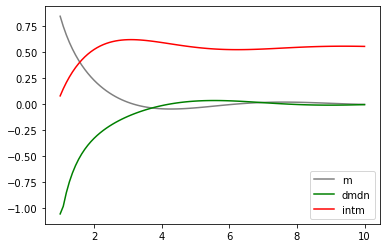

In [112]:

plt.plot(n, m, color='grey')
plt.plot(n, dmdn, color='green')
plt.plot(n,intm, color='red')
plt.legend(('m','dmdn','intm'),loc='best') #esto va con dos parentesis no se por que

>## Problemas

> ### *Problema 1*

Sea $y=e^\frac{-x}{10}sin(x)$ definida en el intervalo $x \in [0,10]$.

1.- Dibuje la función

2.- Calcule la media y la desviación estandar para el intervalo $x \in [4,7]$

3.- Para $x \in [4,7]$ encuentre el valor $y_m$ tal que el 80% de los valores de $y$ son $<y_m$

4.- Compute su derivada

5.- Encuentre los puntos donde la derivada se anula

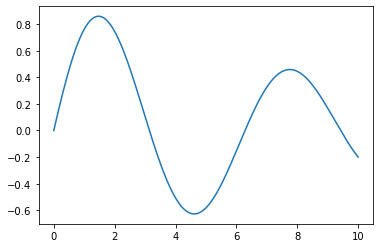

In [113]:
#ejercicio 1
N=10000
x = np.linspace(0,10, N+1)
y = np.exp(-x/10)*np.sin(x)
plt.plot(x,y)

In [114]:
#ejercicio 2
(x>=4)*(x<=7)#condición booleana para seleccionar el intervalo
restriccion=y[(x>=4)*(x<=7)]#indexado
np.mean(y[(x>=4)*(x<=7)])#media

-0.2956023068963138

In [115]:
np.std(y[(x>=4)*(x<=7)])#desviación estandar

0.31448753875085117

In [116]:
#ejercicio 3
np.percentile(restriccion, 80)

0.06145551274590662

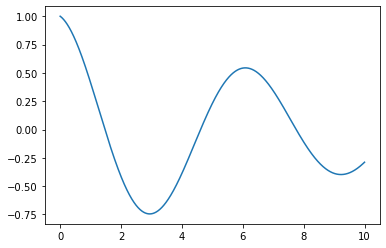

In [117]:
#ejercicio 4
derivada=np.gradient(y,x)
plt.plot(x,derivada)

Para el último ejercicio vamos a discutir algunas formas de hacerlo y por qué no funcionan, ya que es interesante para entender como opera el ordenador discretamente.

In [118]:
derivada[derivada==0]

array([], dtype=float64)

Indexarlo así estaría de puta madre pero es que numericamente el linspace sólo nos crea un grupo finito de valores los cuales los evaluamos por la funcion $y$ , entonces lo más normal será que la derivada numéricamente no se anule la gran mayoría de las veces por que no caerá en el 0 numérico exacto (por eso nos devuelve un array vacío). 

Lo que observaríamos es un puntito arriba del eje x y otro puntito debajo. En teoría la función ha pasado por ahí pero sólo tenemos un número finito de valores que podemos plotear.

In [119]:
x[(derivada>-0.0005) * (derivada<0.0005)]

array([1.471, 4.612, 4.613, 7.754, 7.755])

Aquí lo que le hemos metido es un intervalo de tolerancia pero esto a ojo hay que calcularlo muy bien porque depende de los puntos que generemos con el linspace.

 Y aquí no nos va a salir el punto exacto donde la derivada se anula, sino la pareja de puntos que arriba y abajo del eje $x$ y eso si tenemos suerte de que el espaciado del linspace quepa en el intervalo de tolerancia, porque lo mismo nos saltamos un cero y no nos damos ni cuenta. Aquí nos aproximamos pero la interpretación del resultado no es exacta. 

Podemos intentar hacer la media entre resultados que estén muy cerca. Por ejemplo, arriba tendríamos que los ceros de la derivada están en 1.471, 4.612(5), 7.754(5)

________________________
Probemos ahora a multiplicar elementos consecutivos del array de $\frac{dy}{dx}$

Si truncamos el array derivada del primer elemento no inclusive palante y lo multiplicamos por el array derivada truncado hasta el penúltimo elemento, estamos multiplicando elementos consecutivos (dibuja una serie de puntos consecutivos y quítate el primero y coge los demas, ese es tu primer array. Despues dibuja abajo otra vez la misma serie de puntos y quítate el último y ese es tu otro array. Une con una línea diagonal el primer punto de tu array de arriba con el de abajo y vas a ver cómo se están multiplicando aquí los arrays). Si los elementos son de distinto signo (un punto arriba del eje y otro abajo, es decir, habiendo cruzado el cero), la multiplicación sale negativa. Sólo tendremos que hacer un indexado booleano y filtrarlo.

In [120]:
derivada[1:]*derivada[:-1]<0 #el producto del valor i y su consecutivo
#es negativo?


#este es el método que mejor nos va a funcionar. Atenshon:
# x[derivada[1:]*derivada[:-1]<0] así no me va a dejar indexarlo
#ni de coña porque al array derivada que era del mismo tamaño
#que el array x,le hemos cortado los extremos y el array booleano
# mide un elemento menos de x. Veámoslo

array([False, False, False, ..., False, False, False])

In [121]:
np.size(x)

10001

In [122]:
np.size(derivada[1:]*derivada[:-1]<0)

10000

In [123]:
#entonces hagamos lo siguiente
x[1:][derivada[1:]*derivada[:-1]<0] #dime cuales de los valores de las 
#x se corresponden con el producto negativo de elementos consecutivos

array([1.472, 4.613, 7.755])

Vamos a calcular la integral por pura curiosidad y vamos a ver donde se anula, que lo mismo nos llevamos una sorpresita.

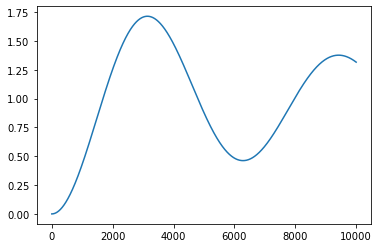

In [124]:
integral= np.cumsum(y)*(x[1]-x[0])
plt.plot(integral)

In [125]:
x[1:][integral[1:]*integral[:-1]<0]

array([], dtype=float64)

VAYA. Parece que la integral se anula en el 0 pero como nosotros en el indexado hemos truncado la x en el primer elemento, nos estamos comiendo el valor $Y(x=0)=0$ y por eso python me devuelve el array indexado como vacío

Moraleja: **CHEQUEAR SI LA FUNCIÓN SE ANULA EN LOS EXTREMOS DEL INTERVALO**

Esto es lo mismo que el método de bipartición para encontrar los ceros por Bolzano pero en vez de bipartir los intervalos, chequeamos par a par de puntos si se da la condición del signo. Pero el problema de mirar si los extremos de los intervalos se anulan lo seguimos teniendo. Mucho ojito. El ordenador no se equivoca haciendo cuentas pero nosotros tenemos que tener siempre el ojo puesto en lo que hacemos.


Creo que esto último tiene solución si le metemos la condición de menor o igual: (no echar muchas cuentas de esto)

In [126]:
x[1:][integral[1:]*integral[:-1]<=0]

array([0.001])

In [127]:
integral[:2]
#esta tratando el segundo valor del array integral como cero porqu es pequeñisimo. Tendríamos el cero exacto y el cero por truncado

array([0.00000000e+00, 9.99899838e-07])

______

> ### *Problema 2*

Sume todos los números desde 0 hasta 10000 excepto aquellos divisibles entre 4 o 7. Hágalo en una sóla línea de código

In [128]:
pic = np.arange(0, 10001,1) #usamos esta línea por limpieza
np.cumsum(pic[(pic%4 != 0) * (pic%7 != 0)])[-1] #los elementos de pic
# para los cuales el resto de dividirlo por 4 NO es cero O el resto
# de dividirlo por 7 NO es cero. Hazme la suma cumulativa de todos 
# esos elementos y coge el ultimo elemento

#o bien...
sum(pic[(pic%4 != 0) * (pic%7 != 0)])

32147142

> ### *Problema 3*

Considere el pétalo de flores $r(\theta)=1+\frac{3}{4}sin(3\theta)$ para $0\le\theta\le2\pi$

1- Dibuje el pétalo

2- Compute el área usando $ Area = \int_{0}^{2\pi} \frac{1}{2}r^2d\theta$

3- Calcule la longitud de arco usando $ L = \int_{0}^{2\pi} \sqrt{(\frac{dr}{d\theta})^2 + r^2} d\theta$

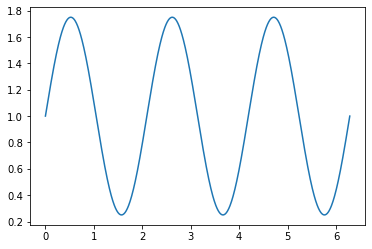

In [129]:
#ejercicio 1
theta= np.linspace(0,2*np.pi,1000)
r_theta=1+0.75*np.sin(3*theta)
plt.plot(theta,r_theta)

#facil no?

VAYA. 

Resulta que tú te imaginas que porque tu variable se llame $\theta$ ya se hace todo en coordenadas polares. Y es que python te dibuja las cosas en cartesianas por defecto. Así que le da igual que lo llames $x$ o $\theta$. Tienes que aplicar una transformación a las variables. Si te acuerdas como eran las transformaciones entre polares y cartesianas, que iban con seno y coseno, es hora de usarlas.

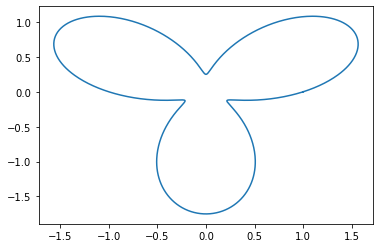

In [130]:
#Vamos a transformar DE POLARES A CARTESIANAS
x = r_theta* np.cos(theta)
y = r_theta* np.sin(theta)

plt.plot(x,y)

In [131]:
#ejercicio 2

np.cumsum(0.5*r_theta**2)*(theta[1]-theta[0])

array([3.14473739e-03, 6.37910355e-03, 9.70432528e-03, 1.31215950e-02,
       1.66320690e-02, 2.02368658e-02, 2.39370642e-02, 2.77337017e-02,
       3.16277728e-02, 3.56202275e-02, 3.97119693e-02, 4.39038541e-02,
       4.81966882e-02, 5.25912271e-02, 5.70881738e-02, 6.16881775e-02,
       6.63918322e-02, 7.11996754e-02, 7.61121864e-02, 8.11297858e-02,
       8.62528336e-02, 9.14816283e-02, 9.68164061e-02, 1.02257339e-01,
       1.07804536e-01, 1.13458039e-01, 1.19217824e-01, 1.25083800e-01,
       1.31055809e-01, 1.37133623e-01, 1.43316946e-01, 1.49605413e-01,
       1.55998588e-01, 1.62495964e-01, 1.69096966e-01, 1.75800945e-01,
       1.82607183e-01, 1.89514891e-01, 1.96523207e-01, 2.03631200e-01,
       2.10837868e-01, 2.18142136e-01, 2.25542862e-01, 2.33038831e-01,
       2.40628760e-01, 2.48311297e-01, 2.56085023e-01, 2.63948447e-01,
       2.71900015e-01, 2.79938106e-01, 2.88061033e-01, 2.96267045e-01,
       3.04554328e-01, 3.12921005e-01, 3.21365139e-01, 3.29884733e-01,
      

VAYA.

Pero si yo lo que quería era un número, no un array.

Pues es que se nos ha metido en la cabeza que la integral se hace con *np.cumsum* y a juir y nos olvidamos de que trabajamos con arrays por algo. Cuando aplicamos *cumsum* nos sale el array con los valores de la primitiva. 

Realmente como lo hemos hecho está bien porque sólo nos tendríamos que quedar con el último valor del array anterior, que es 4.028 que es el valor del área que estamos buscando, pero es poco elegante. 

Moraleja: Utilicemos *cumsum* cuando estemos pensando en el plot de la función primitiva y utilicemos *sum* cuando queramos una cifra, que es la suma de los valores del array.

Como lo que queremos es sumar, pues sumemos, joder. (Igual que en el ejercicio anterior)

In [132]:
Area = 0.5 * sum(r_theta**2) * (theta[1]-theta[0]) #la suma llega hasta 2pi porque los limites de integracion estan definidos en el propio array de theta

Area

4.028310324802908

In [133]:
Arco = sum(np.sqrt(r_theta**2 + np.gradient(r_theta, theta)**2)) * (theta[1]-theta[0])

Arco

11.640021569013872

Aquí podíamos haber computado el tema utiizando *cumsum*, pero no se nos debe olvidar que la derivada que estamos haciendo es numérica y que por lo tanto es otro array. Sólo nos tenemos que currar el argumento de *sum* un poquito más y ya está, recuerda que sólo necesitamos un número, no un array.


> ### *Problema 4*

La potencia enmitida por un cuerpo negro es de la forma $P=A \sigma \epsilon T^4 $

 Después de medir la temperatura de una estrella se encuentra que la Temperatura tiene una dependencia temporal como $T(t)=\frac{T_0}{1+e^{-kt}}$

Dibuje la energía total emitida por la estrella como función del tiempo, la cual tiene una expresión de la forma $E(t)=\int_{t'=0}^{t'=t} P(t')dt'$

........................

Bueno, aquí hay un viaje de cosas que no sabemos. Por lo pronto no sabemos el valor de las constantes, pero reescribamos el término de potencia.

$$P=A \sigma \epsilon(\frac{T_0}{1+e^{-kt}})^4$$

Entonces cómo vamos a dibujar la energia si no sabemos las constantes? Utilicemos cantidades adimensionales, porque eso es lo único que podemos manejar.

Realmente ya con $P$ no podemos lidiar, pero podemos trabajar con $$ \frac{P}{A \sigma \epsilon}= (\frac{T_0}{1+e^{-kt}})^4$$

Tampoco sé lo que vale $T_0$, así que vamos a pasarlo al otro miembro también $$P_{norm}=\frac{P}{A \sigma \epsilon {T_0}^4}= \frac{1}{(1+e^{-kt})^4}$$

Todavía tenemos la $k$ esa dando por culo y no me la puedo quitar de en medio porque va con la $t$.

La cuestión es que ya no vamos a plotear la energía en sí tal y como nos la piden en el ejercicio, sino una energía modificada (que se va a ver modificada de nuevo por un cambio de variable, ahora lo veremos). Podemos llamarla energía normalizada o como queramos, pero lo que tenemos que tener en cuenta es que la energía como tal, no podemos evaluarla. Si supiera el valor de $k$ , sustituyo el numerito y evalúo la integral en $t$ y punto.

Como $kt$ va junto, pues vamos a tratarlas juntos. Vamos a variar $kt$ como un todo. Recuerda que $kt$ es adimensional porque $k$ tiene unidades de $[t]^{-1}$

Dicho esto: veamos la pinta que tiene la Potencia normalizada

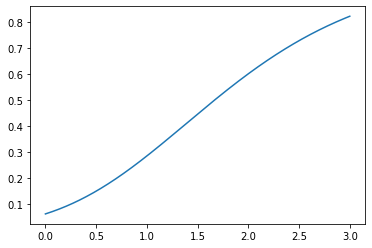

In [134]:
kt = np.linspace(0,3,1000) #los límites de integración son arbitrarios
P_norm = (1/(1+np.exp(-kt)))**4

plt.plot(kt,P_norm)

Ahora realizamos la integral $\tilde{E}_{norm}=E_{norm}k=\frac{k}{A \sigma \epsilon {T_0}^4} E(kt)=\int_{t''_1}^{t''_2} P_{norm}  d\gamma$ donde $\gamma=kt$

Text(0, 0.5, '$\\tilde{E}_{norm}=\\frac{k}{A \\sigma \\epsilon {T_0}^4}  E(kt)$')

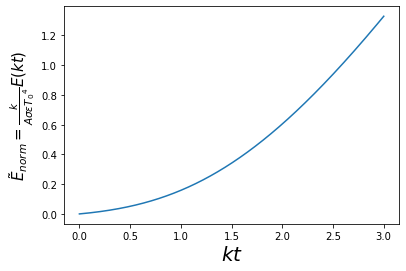

In [135]:
E_norm = np.cumsum(P_norm) * (kt[1]-kt[0])
plt.plot(kt,E_norm)

plt.xlabel('$kt$', size= 20)
plt.ylabel(r'$\tilde{E}_{norm}=\frac{k}{A \sigma \epsilon {T_0}^4}  E(kt)$' , size= 15) #la 'r' al principio le da permiso al label para que tenga ecs. en markdown
#plt.savefig('filename.jpg', dpi=300) para guardarlo en buena resolucion

OJITO CON ESTO.

Al tratar $kt$ como un todo, lo que hemos hecho es un cambio de variable e integrado respecto a $kt$ , con lo cual sale una $k$ dividiendo. Me explico:

$$\gamma=kt$$

$$\frac{d\gamma}{dt}=k$$

Con lo cual $$ dt= \frac{d\gamma}{k}$$

Por lo que la integral queda como
$$E_{norm}=\frac{E(kt)}{A \sigma \epsilon {T_0}^4}=\int_{t''_1}^{t''_2} \frac{1}{(1+e^{-\gamma})^4} \frac{d\gamma}{k}$$

Entonces:

 $$\tilde{E}_{norm}=\frac{E(kt)k}{A \sigma \epsilon {T_0}^4}=\int_{t''_1}^{t''_2} \frac{1}{(1+e^{-\gamma})^4} d\gamma$$

y el comportamiento de esta última integral es lo que estamos ploteando realmente.

OJO CUIDAO: porque esto de tratar a una variable producto como un todo puede salir muy bien, como en este caso que lo único que sale es un factor multiplicativo (con el que hay que estar atento igualmente) pero si el cambio de variable es más feo pueden salir cosas chungas al transformar el diferencial. Lo que quiero decir es que cada caso es de su padre y de su madre y hay que hacer la cuentas aparte para transformar la integral y que te salga algo que puedas meter aquí.

También: que para hablar de valores reales de la Energía sólo habría que multiplicar el valor de  $\tilde{E}_{norm}$ por el factor $\frac{A \sigma \epsilon {T_0}^4}{k}$ una vez lo conociéramos. (Y que esta vez también hemos tenido suerte de poder quitarnos de en medio todos los factores desconocidos y dejarlos en el otro miembro)

______


> ## *Arrays multidimensionales*

Aprenderemos a crear arrays en más dimensiones y a manejar y a operar con ellos.

In [136]:
m1= np.array([[1,2,3],[4,5,6],[7,8,9]]) #No olvidar el bracket que encierra a los demas brackets
m1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Podemos hacer operaciones con ellos que funcionan de manera análoga a los arrays unidimensionales que tratamos antes

In [137]:
m1*2

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [138]:
2/m1

array([[2.        , 1.        , 0.66666667],
       [0.5       , 0.4       , 0.33333333],
       [0.28571429, 0.25      , 0.22222222]])

Una función que vamos a usar mucho en algunos problemas es *ravel( )* , que nos permite coger un array n-dimensional y transformarlo en monodimensional. A primera vista esto, no puede parecernos muy útil pero se pueden hacer cosas muy ingeniosas.

In [139]:
m1.ravel()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

El indexado booleano funciona de la misma manera. Veamos un ejemplo:

In [140]:
m1>5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]])

Podemos usar esto para indexar booleanamente otro array:

In [141]:
m2 = np.random.randn(3,3) #créame una matriz 3x3 de números aleatorios que sigan la distribución normal
m2

array([[-0.8134331 , -0.04104422,  1.73657285],
       [ 0.36885048,  0.75543696,  0.74069359],
       [ 0.08673194, -1.32525986,  0.28393855]])

In [142]:
m2[m1>5] #"los elementos de m2 para los cuales m1 es mayor que cinco" o dicho de otra forma, 
#dame los elementos de m2 en donde estarían los elementos de m1 que son mayores de cinco
#Como nuestro array m1 son todos los numeros del 1 al 9, se supone que esto me tendría que 
#mostrar los ultimos cuatro elementos de m2

array([ 0.74069359,  0.08673194, -1.32525986,  0.28393855])

Cuidado cuando hacemos element indexing. Imaginemos que queremos seleccionadr el primer elemento de $m_1$

In [143]:
m1[0]

array([1, 2, 3])

Vaya, lo que nos ha devuelto es la primera fila. Eso quiere decir que las consecuentes m1[1] y m1[2] nos devolverán la segunda y tercera fila respectivamente

In [144]:
m1[1]


array([4, 5, 6])

In [145]:
m1[2]

array([7, 8, 9])

Bueno, ya que estamos con esto, si quisiera la primera columna, sería tal que así:

In [146]:
m1[:,0] # ":" en el primer lugar significa "ve a través de todas las filas"
#Este comando significa "recorre todas las filas pero coge sólo el primer elemento" = la primera columna

array([1, 4, 7])

Imaginemos que ahora sólo queremos quedarnos con los elementos que coinciden con el 5 y el 8 de $m_1$:

In [147]:
m1[1:,1] #de la primera fila para adelante (no inclusive) y el segundo elemento

array([5, 8])

Venga, imaginemos que ahora nos quedamos con la matriz 2x2 de la esquina inferior izquierda.

In [148]:
m1[1:,:2] #"de la primera fila no inclusive para abajo, y en el segundo elemento hasta que te topes con el tercero no inclusive"

array([[4, 5],
       [7, 8]])

> ## *Funciones 2D*


Si queremos representar una función en 2D tendremos que tener 2 arrays unidimensionales que sirvan de soporte para dar valores al eje $z$, no?

In [149]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 5, 500)

In [150]:
z= x**2 + y**2

ValueError: operands could not be broadcast together with shapes (1000,) (500,) 

No nos funciona. Eso quiere decir que para representar funciones, todos los ejes tienen que ser de la misma dimensión? Sería una limitación considerable. Pues nada más lejos de la realidad, más adelante veremos por qué. Por ahora, vamos a transigir y a hacer los ejes de la misma dimensión

In [ ]:
x = np.linspace(0, 10, 1000)
y = np.linspace(0, 10, 1000)

In [ ]:
z= x**2 + y**2
z

array([0.00000000e+00, 2.00400601e-04, 8.01602403e-04, 1.80360541e-03,
       3.20640961e-03, 5.01001502e-03, 7.21442163e-03, 9.81962944e-03,
       1.28256385e-02, 1.62324487e-02, 2.00400601e-02, 2.42484727e-02,
       2.88576865e-02, 3.38677015e-02, 3.92785178e-02, 4.50901352e-02,
       5.13025538e-02, 5.79157736e-02, 6.49297947e-02, 7.23446169e-02,
       8.01602403e-02, 8.83766650e-02, 9.69938908e-02, 1.06011918e-01,
       1.15430746e-01, 1.25250376e-01, 1.35470806e-01, 1.46092038e-01,
       1.57114071e-01, 1.68536905e-01, 1.80360541e-01, 1.92584977e-01,
       2.05210215e-01, 2.18236254e-01, 2.31663095e-01, 2.45490736e-01,
       2.59719179e-01, 2.74348422e-01, 2.89378468e-01, 3.04809314e-01,
       3.20640961e-01, 3.36873410e-01, 3.53506660e-01, 3.70540711e-01,
       3.87975563e-01, 4.05811217e-01, 4.24047671e-01, 4.42684927e-01,
       4.61722984e-01, 4.81161843e-01, 5.01001502e-01, 5.21241963e-01,
       5.41883225e-01, 5.62925288e-01, 5.84368152e-01, 6.06211817e-01,
      

Párate. Que esto lo que ha hecho es interpretarlo todo como una operación de arrays unidimensionales... Yo lo que quiero es que me cree una especie de mapa donde cada punto sea una coordenada con una $x$ y una $y$. Como en hundir la flota. Como si tuviéramos un *grid* de puntos.

Claro! Lo que tenemos que decirle a python es que cada uno de ellos representa un eje! Necesitamos usar *meshgrids* 

El *meshgrid* es lo que nosotros vamos a usar continuamente en física en python para trabajar con funciones de más de una dimensión. Veamos como funciona:

In [ ]:
xv, yv = np.meshgrid (x,y) #aqui los arrays si pueden tener distintas dimensiones, los meshgrids no tienen por qué ser cuadrados

Echémosle un vistazo a ver cómo se ve el meshgrid, al menos la parte de la $x$

In [ ]:
xv

array([[ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       ...,
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ],
       [ 0.        ,  0.01001001,  0.02002002, ...,  9.97997998,
         9.98998999, 10.        ]])

se ve un poco lioso, pero observa como la primera columna es todo 0, y los valores van aumentando conforme avanzamos las columnas. Es lógico, $x$ tiene que ir creciendo en su eje. $xv$ lo que hace es darle a cada coordenada su etiqueta de la $x$ correspondiente. Lo mismo debería pasar con $xy$ pero con las filas. Comprobémoslo.  (Prefiero no dibujar una matriz más simple donde se vean cada uno de los dos grids porque hay que ir acostumbrandose a interpretar los datos de esta manera. En mi experiencia, los outputs de matrices n-dimensionales no son nada bonitos)

In [ ]:
yv

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01001001,  0.01001001,  0.01001001, ...,  0.01001001,
         0.01001001,  0.01001001],
       [ 0.02002002,  0.02002002,  0.02002002, ...,  0.02002002,
         0.02002002,  0.02002002],
       ...,
       [ 9.97997998,  9.97997998,  9.97997998, ...,  9.97997998,
         9.97997998,  9.97997998],
       [ 9.98998999,  9.98998999,  9.98998999, ...,  9.98998999,
         9.98998999,  9.98998999],
       [10.        , 10.        , 10.        , ..., 10.        ,
        10.        , 10.        ]])

Primera fila todo 0, segunda fila todo 1... Vaya, todo correcto entonces.

Bueno, intentemos dibujar entonces la función que estábamos tratando de plotear antes.

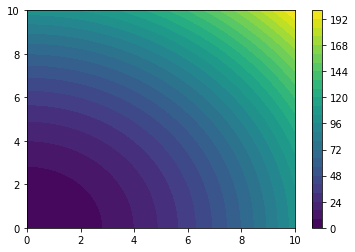

In [ ]:
zv = xv**2 + yv**2

plt. contourf (xv, yv, zv, levels=30) #vamos a dibujarla usando contornos de isoalturas. Va a haber 30 contornos. Aumentar el número de contornos hace que el gradiente de color que vamos a ver sea mas suave
plt.colorbar() #Es buena costumbre añadir una colorbar que hace de leyendar para orientarnos sobre los valores de z que estamos viendo en ese momento. Acostumbremos a ponerla, que no cuesta nada.

______


> # Fundamentos de álgebra lineal

> ## Operaciones con matrices
Aprenderemos a crear arrays en más dimensiones y a manejar y a operar con ellos.

In [ ]:
A = (10*np.random.rand(3,3)).astype(int) #una matriz de enteros de una cifra
A

array([[0, 5, 8],
       [7, 9, 6],
       [7, 3, 2]])

Veamos cómo se multiplican matrices

In [ ]:
b1 = np.array([1,2,3])
b2 = np.array([5,3,7])

A@b1

array([34, 43, 19])

La traspuesta:

In [ ]:
A.T

array([[0, 7, 7],
       [5, 9, 3],
       [8, 6, 2]])

Para hacer el producto escalar:

In [ ]:
b1@b2

32

Otra forma de hacer el producto escalar:

In [ ]:
np.dot(b1,b2)

32

Para el producto vectorial:

In [ ]:
np.cross(b1,b2)

array([ 5,  8, -7])

> ## Sistemas de ecuaciones

$3x+2y+z=4$ <br>
$5x-5y+4z=3$<br>
$6x+z=0$

In [ ]:
A= np.array([[3,2,1],[5,-5,4],[6,0,1]])
C= np.array([4,3,0])

In [ ]:
np.linalg.solve(A,C)

array([-0.49056604,  1.26415094,  2.94339623])

> ## Cálculo de Autovalores

In [ ]:
A= np.array([[4,2,2],[2,4,2],[2,2,4]])
np.linalg.eig(A)

(array([2., 8., 2.]),
 array([[-0.81649658,  0.57735027, -0.23513651],
        [ 0.40824829,  0.57735027, -0.55958248],
        [ 0.40824829,  0.57735027,  0.79471899]]))

Esta función nos devuelve los autovalores y los autovectores. Para definir lo que queremos podemos hacer uso de cómo se nombran las variables en python y así seleccionamos.

**IMPORTANTE: LOS AUTOVECTORES LOS FORMAN LAS COLUMNAS, NO LAS FILAS**

In [ ]:
w,v=np.linalg.eig(A)

w #Problemos primero a que nos devuelva el array de autovalores

array([2., 8., 2.])

Probemos a que nos devuelva ahora el primer autovector, ya que podemos seleccionar lo que queremos de la matriz con lo que sabemos del indexado.

In [ ]:
v1= v[:,0]
v1

array([-0.81649658,  0.40824829,  0.40824829])

Comprobemos que todo esto es verdad y está bien hecho: Si multiplicamos nuestra matriz original $A$ escalarmente por $v_1$, nos tendría que dar lo mismo que multiplicar el primer autovalor por el primer autovector. Es básicamente la ecuación de autovalores<br>
$$A \cdot v1= (Autovalor_1) \cdot v1$$

In [ ]:
A@v1

array([-1.63299316,  0.81649658,  0.81649658])

In [ ]:
w[0]*v1

array([-1.63299316,  0.81649658,  0.81649658])

> # Ejemplos

> ## Problema 1

Sea $f(x,y)= e ^ {-(x^2 + y^2)} \cdot \sin(x)$ para $-2 \leq x \leq 2$ y $-2 \leq y \leq 2$ <br>

1. Haga un plot con contornos de $f$ 
2. Encuentre el volumen de $ \lvert {f(x,y)} \rvert $ en el intervalo especificado
3. Encuentre el volumen de $ \lvert {f(x,y)} \rvert $ sólo en la región donde $\sqrt{(x^2+y^2)}>0.5$

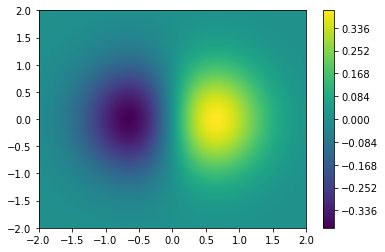

In [ ]:
#1

x= np.linspace(-2,2,1000)
y= np.linspace(-2,2,1000)
xv,yv= np.meshgrid(x,y)

f= np.exp(-(xv**2+yv**2)) * np.sin(xv)

plt.contourf(xv, yv, f, levels=200)
plt.colorbar()

Para el segundo apartado, vamos a pensar en términos de la integral de Riemann en 2D. Lo que voy a hacer es sumar los volúmenes de tantos paralelepípedos como puntos del grid haya. Para ello, vamos a sumar todos los valores de las alturas de cada punto de $f$ usando *sum( )* en *ravel(f)*. $f$ es una matriz bidimensional a la que le aplicaremos el ravel para ir sumando. Hay que multiplicar estas alturas por el diferencial de área en el eje $x$ e $y$.

In [ ]:
#2
np.abs(f.ravel()).sum() * (x[1]-x[0]) * (y[1]-y[0]) #los diferenciales los calculamos de esta manera tan ingeniosa

1.4861858145124311

También se puede hacer utilizando la funcion *np.diff( )*, que nos da las diferencias entre los elementos de un array. Si aplicamos esta función a nuestros ejes, es obvio pensar que las diferencias son iguales.

In [ ]:
np.diff(x)

array([0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004004,
       0.004004, 0.004004, 0.004004, 0.004004, 0.004004, 0.004

In [ ]:
np.diff(x)[0] #con coger cualquier elemento nos vale, nosotros cogemos el primero y ya

0.004004004004003914

In [ ]:
#comprobemos que sale lo mismo
np.abs(f.ravel()).sum() * np.diff(x)[0] *np.diff(y)[0] #en nuestro caso los diferenciales para x e y son iguales, pero podrian no serlo si trabajamos con ejes raros

1.4861858145124311

Para el tercer apartado, que es larguísimo en papel, podemos utilizar un indexado de arrays (o máscara) porque sólo necesito calcular los puntos donde el valor de *f* es *true* dentro del círculo que se ha definido.

In [ ]:
#3
xv**2 + yv**2 > 0.5**2 #primero vamos a definir la base del indexado

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Ya tenemos la máscara. Ahora sólo hay que utilizar el indexado de los valores de *f* sobre la máscara

In [ ]:
restric= f[xv**2 + yv**2 > 0.5**2] #aplicamos el indexado
np.abs(restric.ravel()).sum() * np.diff(x)[0] *np.diff(y)[0]

1.3447652930203164

> ## Problema 2

Un campo eléctrico está dado por $\vec{E}(z,t)= E_0 \cos(z-t)\hat{x} + 2E_0 \cos(z-t + \pi/2)\hat{y}$

1. Encuentre el campo magnético para todo $z \in [0,4\pi]$ y $t \in [0,10]$ usando $ \vec{B}(z,t)=\hat{z}\times \vec{E}(z,t)$ 
2. Calcule el vector de Poynting $\vec{S}=\vec{E}\times\vec{B}$ para todo $z, t$

In [151]:
z= np.linspace(0,4*np.pi,100)
t= np.linspace(0,10,100)

tv,zv= np.meshgrid(t,z)

In [152]:
Ex= np.cos(zv-tv)
Ey= 2*np.cos(zv-tv + np.pi/2)
Ez= 0*tv #truquito: nos da un array nulo, que es lo que queremos nosotros

Vamos a normalizar como $$\frac{\vec{E}(z,t)}{E_0 }= \cos(z-t)\hat{x} + 2\cos(z-t + \pi/2)\hat{y}$$
para simplificar los cálculos. Ya en función del valor de $E_0$ haríamos las cuentas adecuadamente. Busquemos siempre sacar este tipo de constantes del tratamiento.

Ahora expresemos como función $E_x (t)$ en $z=0$

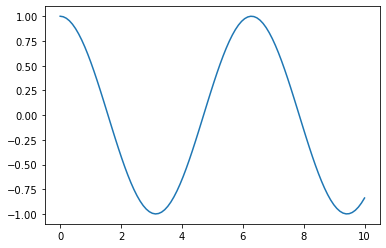

In [153]:
plt.plot(t, Ex[0]) #El elemento 0-ésimo de Ex nos da el tiempo   ******ENTERARME DE POR QUE ESTO ES ASI******


Ahora expresemos como función $E_x (z)$ en $t=0$

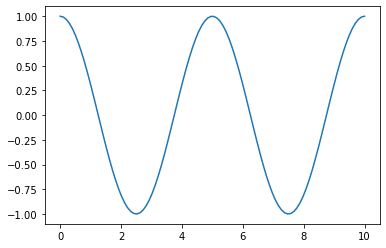

In [154]:
plt.plot(t, Ex[:,0]) #nos da el

In [155]:
E= np.array([Ex,Ey,Ez])
E

array([[[ 1.00000000e+00,  9.94902816e-01,  9.79663226e-01, ...,
         -9.31164735e-01, -8.89652856e-01, -8.39071529e-01],
        [ 9.91954813e-01,  9.99664020e-01,  9.97182283e-01, ...,
         -9.69828789e-01, -9.40302293e-01, -9.01190009e-01],
        [ 9.67948701e-01,  9.88340255e-01,  9.98656304e-01, ...,
         -9.92887934e-01, -9.75821913e-01, -9.48808004e-01],
        ...,
        [ 9.67948701e-01,  9.37689522e-01,  8.97871191e-01, ...,
         -8.09751458e-01, -7.46454741e-01, -6.75548390e-01],
        [ 9.91954813e-01,  9.74133253e-01,  9.46381021e-01, ...,
         -8.77517892e-01, -8.24688573e-01, -7.63452074e-01],
        [ 1.00000000e+00,  9.94902816e-01,  9.79663226e-01, ...,
         -9.31164735e-01, -8.89652856e-01, -8.39071529e-01]],

       [[ 1.22464680e-16,  2.01676841e-01,  4.01297713e-01, ...,
         -7.29197467e-01, -9.13274975e-01, -1.08804222e+00],
        [-2.53184907e-01, -5.18400645e-02,  1.50033255e-01, ...,
         -4.87574080e-01, -6.80680831e

Este anterior array se compone de 3 matrices 100x100 que son los valores de $E_x ,E_y ,E_z$ respectivamente. La cuestión es que al tener cada coordenada como un array de 100x100, el producto vectorial que queremos hacer ahora para hallar $\vec B$ no es tan directo y python no lo va a interpretar como nosotros queremos. Lo ideal es que nosotros podamos expresar el array anterior como una serie de tripletas con los valores $[E_x , E_t , E_z]$ para cada coordenada. Eso lo podemos hacer con un *swapping*

In [156]:
E= np.swapaxes(E, 0, -1) #swapeamos el eje que etiqueta Ex, Ey, Ez con el -1, es decir, con el ultimo, que son todos los puntos individuales en sí mismos. Veámoslo.
E

array([[[ 1.00000000e+00,  1.22464680e-16,  0.00000000e+00],
        [ 9.91954813e-01, -2.53184907e-01,  0.00000000e+00],
        [ 9.67948701e-01, -5.02295974e-01,  0.00000000e+00],
        ...,
        [ 9.67948701e-01,  5.02295974e-01,  0.00000000e+00],
        [ 9.91954813e-01,  2.53184907e-01,  0.00000000e+00],
        [ 1.00000000e+00,  1.10218212e-15,  0.00000000e+00]],

       [[ 9.94902816e-01,  2.01676841e-01,  0.00000000e+00],
        [ 9.99664020e-01, -5.18400645e-02,  0.00000000e+00],
        [ 9.88340255e-01, -3.04522843e-01,  0.00000000e+00],
        ...,
        [ 9.37689522e-01,  6.94948515e-01,  0.00000000e+00],
        [ 9.74133253e-01,  4.51948690e-01,  0.00000000e+00],
        [ 9.94902816e-01,  2.01676841e-01,  0.00000000e+00]],

       [[ 9.79663226e-01,  4.01297713e-01,  0.00000000e+00],
        [ 9.97182283e-01,  1.50033255e-01,  0.00000000e+00],
        [ 9.98656304e-01, -1.03645294e-01,  0.00000000e+00],
        ...,
        [ 8.97871191e-01,  8.80516495e-01,

Ahora sí puedo hacer el producto vectorial:

In [157]:
B= np.cross(np.array([0,0,1]),E)

B

array([[[-1.22464680e-16,  1.00000000e+00,  0.00000000e+00],
        [ 2.53184907e-01,  9.91954813e-01, -0.00000000e+00],
        [ 5.02295974e-01,  9.67948701e-01, -0.00000000e+00],
        ...,
        [-5.02295974e-01,  9.67948701e-01,  0.00000000e+00],
        [-2.53184907e-01,  9.91954813e-01,  0.00000000e+00],
        [-1.10218212e-15,  1.00000000e+00,  0.00000000e+00]],

       [[-2.01676841e-01,  9.94902816e-01,  0.00000000e+00],
        [ 5.18400645e-02,  9.99664020e-01, -0.00000000e+00],
        [ 3.04522843e-01,  9.88340255e-01, -0.00000000e+00],
        ...,
        [-6.94948515e-01,  9.37689522e-01,  0.00000000e+00],
        [-4.51948690e-01,  9.74133253e-01,  0.00000000e+00],
        [-2.01676841e-01,  9.94902816e-01,  0.00000000e+00]],

       [[-4.01297713e-01,  9.79663226e-01,  0.00000000e+00],
        [-1.50033255e-01,  9.97182283e-01,  0.00000000e+00],
        [ 1.03645294e-01,  9.98656304e-01, -0.00000000e+00],
        ...,
        [-8.80516495e-01,  8.97871191e-01,

Tenemos que swapear los ejes de vuelta

In [158]:
B= np.swapaxes(B, 0, -1)
Bx, By, Bz = B
B

array([[[-1.22464680e-16, -2.01676841e-01, -4.01297713e-01, ...,
          7.29197467e-01,  9.13274975e-01,  1.08804222e+00],
        [ 2.53184907e-01,  5.18400645e-02, -1.50033255e-01, ...,
          4.87574080e-01,  6.80680831e-01,  8.66848471e-01],
        [ 5.02295974e-01,  3.04522843e-01,  1.03645294e-01, ...,
          2.38105444e-01,  4.37134278e-01,  6.31706804e-01],
        ...,
        [-5.02295974e-01, -6.94948515e-01, -8.80516495e-01, ...,
          1.17354604e+00,  1.33087237e+00,  1.47463131e+00],
        [-2.53184907e-01, -4.51948690e-01, -6.46105141e-01, ...,
          9.59087794e-01,  1.13117418e+00,  1.29172897e+00],
        [-1.10218212e-15, -2.01676841e-01, -4.01297713e-01, ...,
          7.29197467e-01,  9.13274975e-01,  1.08804222e+00]],

       [[ 1.00000000e+00,  9.94902816e-01,  9.79663226e-01, ...,
         -9.31164735e-01, -8.89652856e-01, -8.39071529e-01],
        [ 9.91954813e-01,  9.99664020e-01,  9.97182283e-01, ...,
         -9.69828789e-01, -9.40302293e

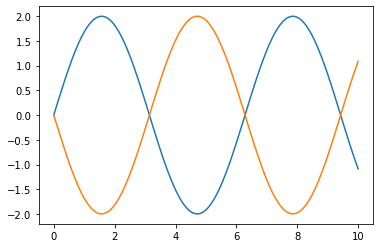

In [161]:
plt.plot(t, Ey[0])
plt.plot(t, Bx[0])
plt.show()   

Que $E_y$ y $B_x$ sean el negativo el uno del otro nos demuestra que esto está bien hecho.

In [162]:
B= np.swapaxes(B,0,-1)

S= np.cross(E,B)
S

array([[[ 0.        , -0.        ,  1.        ],
        [ 0.        ,  0.        ,  1.04807695],
        [ 0.        ,  0.        ,  1.18922593],
        ...,
        [ 0.        , -0.        ,  1.18922593],
        [ 0.        , -0.        ,  1.04807695],
        [ 0.        , -0.        ,  1.        ]],

       [[ 0.        , -0.        ,  1.03050516],
        [ 0.        ,  0.        ,  1.00201554],
        [ 0.        ,  0.        ,  1.06955062],
        ...,
        [ 0.        , -0.        ,  1.36221508],
        [ 0.        , -0.        ,  1.15319321],
        [ 0.        , -0.        ,  1.03050516]],

       [[ 0.        , -0.        ,  1.12077989],
        [ 0.        , -0.        ,  1.01688248],
        [ 0.        ,  0.        ,  1.00805676],
        ...,
        [ 0.        , -0.        ,  1.58148197],
        [ 0.        , -0.        ,  1.31308889],
        [ 0.        , -0.        ,  1.12077989]],

       ...,

       [[ 0.        ,  0.        ,  1.39879671],
        [ 0

In [163]:
S= np.swapaxes(S,0,-1)
Sx, Sy, Sz = S #Para comprobar que está bien hecho, podemos ver que Sx y Sy para este caso particular, son nulos. Y que Sz es el único no nulo.

In [164]:
Sx

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [165]:
Sy

array([[-0., -0., -0., ...,  0.,  0.,  0.],
       [ 0.,  0., -0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [-0., -0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ...,  0.,  0.,  0.]])

In [166]:
Sz

array([[1.        , 1.03050516, 1.12077989, ..., 1.39879671, 1.62555339,
        1.88787691],
       [1.04807695, 1.00201554, 1.01688248, ..., 1.17829636, 1.3474948 ,
        1.5635697 ],
       [1.18922593, 1.06955062, 1.00805676, ..., 1.04252065, 1.14331478,
        1.29929012],
       ...,
       [1.18922593, 1.36221508, 1.58148197, ..., 2.03290773, 2.32841596,
        2.63090312],
       [1.04807695, 1.15319321, 1.31308889, ..., 1.68988705, 1.95966627,
        2.25142279],
       [1.        , 1.03050516, 1.12077989, ..., 1.39879671, 1.62555339,
        1.88787691]])

> ## Problema 3

Encuentre las soluciones a $(\frac{d^2}{dx}+(10x)^2)f=\lambda f$ con condiciones de contorno $f(0)=f(1)=0$

1. Use el método de autovalores y que $\frac{d^2 f}{dx^2} \approx \frac{f_{i+1} + f_{i-1} -2f_i}{\Delta x^2}$ donde $f_i=f(i\Delta x)$ e $i$ es un entero.

**AVISO: Mucho cuidado con los rangos de $N$ según con qué estemos trabajando. Cuidado con los $N+1, N-1$...**


Para el desarrollo de este problema, tenemos que tener en cuenta que si $f$ va a consistir en un array de puntos $f=[f_0, f_1, f_2, f_3, ..., f_{N+1}]$ y que si $\frac{d^2 f}{dx^2} \approx \frac{f_{i+1} + f_{i-1} -2f_i}{\Delta x^2}$, entonces:

$$[\frac{d^2}{dx^2}]f_1 \approx \frac{f_{2} + f_{0} -2f_1}{\Delta x^2}$$
$$[\frac{d^2}{dx^2}]f_2 \approx \frac{f_{3} + f_{1} -2f_2}{\Delta x^2}$$
$$\vdots$$
$$[\frac{d^2}{dx^2}]f_N \approx \frac{f_{N+1} + f_{N-1} -2f_N}{\Delta x^2}$$

Recordemos $f_0=f_{N+1} =0$ por las condiciones de contorno.

Significa entonces que $$[\frac{d^2}{dx^2}]f = \frac{1}{\Delta x^2} \begin{bmatrix} f_2 -2f_1\\ f_{3} + f_{1} -2f_2\\ \vdots\\ f_{N+1} + f_{N-1} -2f_N\\\end{bmatrix} = \frac{1}{\Delta x^2} \begin{bmatrix}  -2 & 1 \\1 &-2 & 1 \\ & 1 &-2 & 1 \\ &&\ddots \\&&&-1 &-2 \end{bmatrix} \begin{bmatrix} f_1 \\\vdots \\\vdots \\ f_N \end{bmatrix}$$

De igual forma, para el segundo operador:

$$[10x]^2\vec f = [h(x)]\vec f =\begin{bmatrix} h_1 f_1\\ h_2 f_2\\ \vdots\\ h_{N}f_{N}\\ \end{bmatrix} = \begin{bmatrix}  h_1& & &\\& &h_2 & &\\& & &\ddots& \\ & & & &h_N \\ \end{bmatrix} \begin{bmatrix} f_1 \\\vdots \\\vdots \\ f_N \end{bmatrix}$$ 

¿Por qué lo hacemos así? Para poder sumar esta segunda matriz diagonal con la primera matriz "semi-diagonal" de antes y diagonalizar todo, ya que no sabemos *f*.

In [188]:
N= 1000

x = np.linspace(0,1,N+1) #N+1 porque empezamos a contar en 0 contamos con los extremos 
dx= np.diff(x)[0] # = x[1]-x[0]

Vamos a definir las diagonales que nos hacen falta para caracterizar las matrices.

In [189]:
main_diag = -2*np.ones(N-1) #diagonal principal. N-1 porque queremos los puntos interiores a los extremos
off_diag = np.ones(N-2) #diagonal abyacente. Escribimos N-2 porque la diagonal abyacente tiene un elemento menos

deriv_matrix= ((np.diag(main_diag)) + np.diag(off_diag, 1) + np.diag(off_diag, -1))/dx**2 # Primera matriz, la "semi-diagonal"
deriv_matrix

array([[-2000000.,  1000000.,        0., ...,        0.,        0.,
               0.],
       [ 1000000., -2000000.,  1000000., ...,        0.,        0.,
               0.],
       [       0.,  1000000., -2000000., ...,        0.,        0.,
               0.],
       ...,
       [       0.,        0.,        0., ..., -2000000.,  1000000.,
               0.],
       [       0.,        0.,        0., ...,  1000000., -2000000.,
         1000000.],
       [       0.,        0.,        0., ...,        0.,  1000000.,
        -2000000.]])

In [183]:
x2_matrix = np.diag((10*x[1:-1])**2) #segunda matriz
x2_matrix

array([[1.00000e-04, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 4.00000e-04, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 9.00000e-04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 9.94009e+01,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.96004e+01, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 9.98001e+01]])

In [184]:
izq= deriv_matrix + x2_matrix #primer miembro o miembro de la izquierda
izq

array([[-1999999.9999,  1000000.    ,        0.    , ...,        0.    ,
               0.    ,        0.    ],
       [ 1000000.    , -1999999.9996,  1000000.    , ...,        0.    ,
               0.    ,        0.    ],
       [       0.    ,  1000000.    , -1999999.9991, ...,        0.    ,
               0.    ,        0.    ],
       ...,
       [       0.    ,        0.    ,        0.    , ..., -1999900.5991,
         1000000.    ,        0.    ],
       [       0.    ,        0.    ,        0.    , ...,  1000000.    ,
        -1999900.3996,  1000000.    ],
       [       0.    ,        0.    ,        0.    , ...,        0.    ,
         1000000.    , -1999900.1999]])

Procedamos a diagonalizar:

In [197]:
w,v= np.linalg.eigh(izq) #diagonalizamos
# w es el array de los autovalores
# v es el array de los autovectores (autoarrays en nuestro caso)

#los autovalores en python aparecen en orden descendente, así que el último será el autovalor de nuestro estado fundamental
w[-1] #el último elemento

29.855323222432386

Las autofunciones nos vienen devueltas de manera que tenemos que coger las columnas. *(Ahora mismo tengo un poco de lío y no se por qué pero más o menos sé por donde van los tiros, así que lo dejo como ejercicio para el lector)*

In [199]:
v

array([[-2.68102902e-04, -3.48575667e-04,  4.58553075e-04, ...,
         3.72473476e-04, -1.90040297e-04, -2.81768141e-05],
       [ 5.36197747e-04,  6.97126284e-04, -9.17049631e-04, ...,
         7.44925311e-04, -3.80078540e-04, -5.63544695e-05],
       [-8.04276477e-04, -1.04562680e-03,  1.37543315e-03, ...,
         1.11733387e-03, -5.70112676e-04, -8.45338073e-05],
       ...,
       [-8.94416123e-05,  4.41702575e-04,  9.68353537e-04, ...,
         1.44115218e-03,  1.07670763e-03, -1.11717080e-03],
       [ 5.96242840e-05, -2.94461568e-04, -6.45581730e-04, ...,
         9.60894431e-04,  7.17871161e-04, -7.44823850e-04],
       [-2.98111024e-05,  1.47228727e-04,  3.22794651e-04, ...,
         4.80485150e-04,  3.58955432e-04, -3.72424950e-04]])

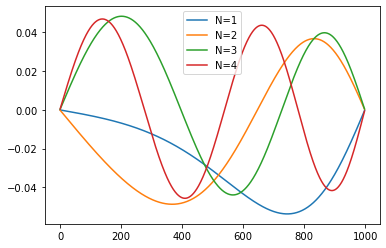

In [205]:
#"recorre todas las filas y coge la ultima columna/penultima columna/antepenultima columna..."
plt.plot(v[:,-1], label= 'N=1') #la autofunción del menor autovalor
plt.plot(v[:,-2], label= 'N=2')
plt.plot(v[:,-3], label= 'N=3')
plt.plot(v[:,-4], label= 'N=4')

plt.legend()


Y con eso ya tendríamos determinados también los autoestados.

Y con esto, tendríamos terminado el cuaderno de numpy para físicos y/o matemáticos. Numpy es mucho más amplio que esto y mi recomendación es buscar en su guía de uso más funciones chulas que nos puedan servir y aprender a utilizarlas, ésto es sólo lo básico. También podríamos ser capaces de operar con ficheros de datos en *.csv* pero eso, para otra vez.